In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
# Kolumny i unikalne wartości
for i in data.columns:
    print(i)
    print(data[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [3]:
# konwersja typu kolumny Total Charges z string na float i uzupełnienie nanów zerami.
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"], errors='coerce')
data["TotalCharges"] = data["TotalCharges"].replace(np.nan, 0, regex=True)

In [4]:
# podział na data i target
X = data.drop(columns="Churn")
y = data["Churn"]

In [5]:
# podział na czesc testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [6]:
# One Hot Encoding na zbiorze treningowym 
encoder = OneHotEncoder(sparse=False)
x_train_cat = X_train[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]]
transformed = encoder.fit_transform(x_train_cat)

In [7]:
colnames = []
for cat in encoder.categories_[0]:
  colnames.append(f'gender_{cat}')

for cat in encoder.categories_[1]:
  colnames.append(f'Partner_{cat}')

for cat in encoder.categories_[2]:
  colnames.append(f'Dependents_{cat}')

for cat in encoder.categories_[3]:
  colnames.append(f'PhoneService_{cat}')

for cat in encoder.categories_[4]:
  colnames.append(f'MultipleLines_{cat}')

for cat in encoder.categories_[5]:
  colnames.append(f'InternetService_{cat}')

for cat in encoder.categories_[6]:
  colnames.append(f'OnlineSecurity_{cat}')

for cat in encoder.categories_[7]:
  colnames.append(f'OnlineBackup_{cat}')

for cat in encoder.categories_[8]:
  colnames.append(f'DeviceProtection_{cat}') 

for cat in encoder.categories_[9]:
  colnames.append(f'TechSupport_{cat}') 

for cat in encoder.categories_[10]:
  colnames.append(f'StreamingTV_{cat}')

for cat in encoder.categories_[11]:
  colnames.append(f'StreamingMovies_{cat}')

for cat in encoder.categories_[12]:
  colnames.append(f'Contract_{cat}')

for cat in encoder.categories_[13]:
  colnames.append(f'PaperlessBilling_{cat}')\

for cat in encoder.categories_[14]:
  colnames.append(f'PaymentMethod_{cat}')

# for cat in encoder.categories_[14]:
#   colnames.append(f'Contract_{cat}')




colnames

['gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'Pa

In [8]:
# połączenie encodowanych kolumn z pozostałymi ze zbioru treningowego
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train_transf = pd.DataFrame(transformed, columns=colnames)
X_train_transf["tenure"] = X_train["tenure"]
X_train_transf["MonthlyCharges"] = X_train["MonthlyCharges"]
X_train_transf["TotalCharges"] = X_train["TotalCharges"]
X_train_transf["SeniorCitizen"] = X_train["SeniorCitizen"]


In [9]:
# One Hot encoding dla kolumn ze zbioru testowego oraz połączenie z pozostałymi kolumnami

test_transformed = encoder.fit_transform(X_test[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]])
X_test_transf = pd.DataFrame(test_transformed, columns=colnames)
X_test_transf["tenure"] = X_test["tenure"]
X_test_transf["MonthlyCharges"] = X_test["MonthlyCharges"]
X_test_transf["TotalCharges"] = X_test["TotalCharges"]
X_test_transf["SeniorCitizen"] = X_test["SeniorCitizen"]

In [10]:
# konwersja wartości z kolumny churn z yes/no do wartości 1/0
lb = LabelBinarizer()
transformedYtrain = lb.fit_transform(y_train)
transformedYtest = lb.fit_transform(y_test)


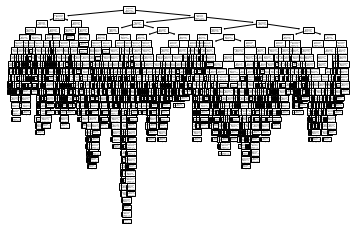

In [11]:
drzewo = DecisionTreeClassifier()
drzewo.fit(X_train_transf, transformedYtrain)
plot_tree(drzewo)
plt.show()

In [12]:
pred = drzewo.predict(X_test_transf)
np.mean(transformedYtest == pred)

0.5979929289606861

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(transformedYtest, pred)

0.7068843151171044

In [14]:
# Optymalizacja hiperparametrów
params={'criterion':['gini', 'entropy'],
       'max_depth':[1, 2, 3, 4, 5, 6]}
grid = GridSearchCV(estimator=drzewo, 
                    param_grid=params, 
                    verbose=10, 
                    scoring='accuracy',
                   cv=10)
grid.fit(X_train_transf, transformedYtrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=2, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.750, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.758, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ......... criterion=gini, max_depth=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] .

[CV] ...... criterion=entropy, max_depth=3, score=0.773, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.760, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ...... criterion=entropy, max_depth=4, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ...... criterion=entropy, max_depth=4, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [15]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [16]:
grid.best_score_

0.7955270649887256

In [17]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(166.70250000000001, 199.32, 'X[32] <= 0.5\nentropy = 0.832\nsamples = 5634\nvalue = [4149, 1485]'),
 Text(87.885, 163.07999999999998, 'X[34] <= 0.5\nentropy = 0.349\nsamples = 2561\nvalue = [2393, 168]'),
 Text(44.64, 126.83999999999999, 'X[31] <= 0.5\nentropy = 0.496\nsamples = 1186\nvalue = [1057, 129]'),
 Text(22.32, 90.6, 'X[39] <= 0.5\nentropy = 0.282\nsamples = 655\nvalue = [623, 32]'),
 Text(11.16, 54.359999999999985, 'X[41] <= 25.5\nentropy = 0.217\nsamples = 549\nvalue = [530, 19]'),
 Text(5.58, 18.119999999999976, 'entropy = 0.351\nsamples = 197\nvalue = [184, 13]'),
 Text(16.740000000000002, 18.119999999999976, 'entropy = 0.125\nsamples = 352\nvalue = [346, 6]'),
 Text(33.480000000000004, 54.359999999999985, 'X[42] <= 82.45\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(27.9, 18.119999999999976, 'entropy = 0.35\nsamples = 76\nvalue = [71, 5]'),
 Text(39.06, 18.119999999999976, 'entropy = 0.837\nsamples = 30\nvalue = [22, 8]'),
 Text(66.96000000000001, 90.6,

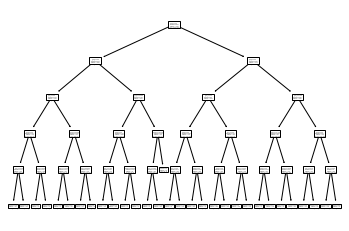

In [18]:
plot_tree(grid.best_estimator_)

In [19]:
Model = grid.best_estimator_
predykcja = Model.predict_proba(X_test_transf)
predykcja

array([[0.98431373, 0.01568627],
       [1.        , 0.        ],
       [0.98295455, 0.01704545],
       ...,
       [0.46650718, 0.53349282],
       [0.8815331 , 0.1184669 ],
       [0.98431373, 0.01568627]])

In [20]:
X_both_cat = X[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]]
X_both_transformed = encoder.fit_transform(X_both_cat)
X_both_transf = pd.DataFrame(X_both_transformed, columns=colnames)
X_both_transf["tenure"] = X["tenure"]
X_both_transf["MonthlyCharges"] = X["MonthlyCharges"]
X_both_transf["TotalCharges"] = X["TotalCharges"]
X_both_transf["SeniorCitizen"] = X["SeniorCitizen"]
X_both_transf.head()
X_both_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7043 non-null   float64
 1   gender_Male                              7043 non-null   float64
 2   Partner_No                               7043 non-null   float64
 3   Partner_Yes                              7043 non-null   float64
 4   Dependents_No                            7043 non-null   float64
 5   Dependents_Yes                           7043 non-null   float64
 6   PhoneService_No                          7043 non-null   float64
 7   PhoneService_Yes                         7043 non-null   float64
 8   MultipleLines_No                         7043 non-null   float64
 9   MultipleLines_No phone service           7043 non-null   float64
 10  MultipleLines_Yes                        7043 no

In [21]:
predykcja1 = Model.predict_proba(X_both_transf)
predykcja1[4]

X_both_transf.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,29.85,29.85,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,34,56.95,1889.50,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2,53.85,108.15,0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,45,42.30,1840.75,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,70.70,151.65,0


In [22]:
dataframe = pd.DataFrame(data=predykcja1, columns=["NoChurn","YesChurn"])
X_both_transf_pred = X_both_transf
X_both_transf_pred["YesChurn"] = dataframe["YesChurn"]
# X_both_transf_pred["NoChurn"] = dataframe["NoChurn"]
X_both_transf_pred.head()



,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,YesChurn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1,29.85,29.85,0,0.532020
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,34,56.95,1889.50,0,0.017045
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2,53.85,108.15,0,0.532020
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,45,42.30,1840.75,0,0.017045
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2,70.70,151.65,0,0.671256


In [23]:
Woman = X_both_transf_pred[X_both_transf_pred["gender_Female"]  == 1.0]
WomanMean = Woman["YesChurn"].mean()
Man = X_both_transf_pred[X_both_transf_pred["gender_Female"]  == 0.0]
ManMean = Man["YesChurn"].mean()
" Mean of Womans probabilities of churn is ",WomanMean, " Mean of Mans probabilities of churn is ", ManMean

(' Mean of Womans probabilities of churn is ',
 0.2703383393816354,
 ' Mean of Mans probabilities of churn is ',
 0.2629748480134424)

In [24]:
# Model Bayesa
bayes = GaussianNB()
bayes.fit(X_train_transf, transformedYtrain)
bayes.class_prior_
bayes.score(X_test_transf,transformedYtest)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6614620298083748

In [25]:
# Random forest
RF = RandomForestClassifier()
RF.fit(X_train_transf, transformedYtrain)
y_pred=RF.predict(X_test_transf)
print("Accuracy:",metrics.accuracy_score(transformedYtest, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.7785663591199432


In [26]:
feature_imp = pd.Series(Model.feature_importances_).sort_values(ascending=False)
feature_imp

ImportantCols = feature_imp.iloc[:13]
ImportantCols

32    0.528590
41    0.138011
12    0.123168
43    0.043729
34    0.034587
23    0.029824
31    0.027525
42    0.026486
39    0.022719
17    0.012378
44    0.007244
35    0.005738
5     0.000000
dtype: float64

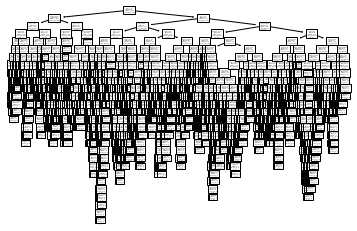

0.716820440028389

In [36]:
# Contract,tenure,internet service, total charges, streaming movies,monthly charges, tech support,payment method,online backup, seniorcitizen,paperless billing,churn
Imp_data = data[["Contract","tenure","InternetService","TotalCharges","StreamingMovies","MonthlyCharges","TechSupport","PaymentMethod","OnlineBackup","SeniorCitizen","PaperlessBilling","Churn"]]

Imp_data_to_encode = Imp_data.drop(columns=["tenure","TotalCharges","MonthlyCharges","SeniorCitizen"])
Imp_encoder=OneHotEncoder(sparse=False)
Imp_encoded = Imp_encoder.fit_transform(Imp_data_to_encode)
Impcols = []
for cat in Imp_encoder.categories_[0]:
    Impcols.append(f'Contract_{cat}')

for cat in Imp_encoder.categories_[1]:
    Impcols.append(f'InternetService_{cat}')

for cat in Imp_encoder.categories_[2]:
    Impcols.append(f'StreamingMovies_{cat}')

for cat in Imp_encoder.categories_[3]:
    Impcols.append(f'TechSupport_{cat}')

for cat in Imp_encoder.categories_[4]:
    Impcols.append(f'PaymentMethod_{cat}')

for cat in Imp_encoder.categories_[5]:
    Impcols.append(f'OnlineBackup_{cat}')
  
for cat in Imp_encoder.categories_[6]:
    Impcols.append(f'PaperlessBilling_{cat}')

for cat in Imp_encoder.categories_[7]:
    Impcols.append(f'Churn_{cat}')

Imp_final_data = pd.DataFrame(Imp_encoded, columns=Impcols)
Imp_final_data["tenure"] = Imp_data["tenure"]
Imp_final_data["MonthlyCharges"] = Imp_data["MonthlyCharges"]
Imp_final_data["TotalCharges"] = Imp_data["TotalCharges"]
Imp_final_data["SeniorCitizen"] = Imp_data["SeniorCitizen"]

yi = Imp_final_data[["Churn_No","Churn_Yes"]]
Xi = Imp_final_data.drop(columns=["Churn_No","Churn_Yes"])

Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=.2, random_state=100)

Idrzewo = DecisionTreeClassifier()
Idrzewo.fit(Xi_train, yi_train)

plot_tree(Idrzewo)
plt.show()

Ipred = Idrzewo.predict(Xi_test)
accuracy_score(yi_test, Ipred)






Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.729, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.706, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.741, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.730, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=2, score=0.757, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.748, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.803, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.750, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] .

[CV] ...... criterion=entropy, max_depth=2, score=0.793, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] ...... criterion=entropy, max_depth=2, score=0.757, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] ...... criterion=entropy, max_depth=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] ...... criterion=entropy, max_depth=2, score=0.748, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] ...... criterion=entropy, max_depth=2, score=0.803, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] ...... criterion=entropy, max_depth=2, score=0.750, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] ...... criterion=entropy, max_depth=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=2 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.2s finished


0.8001432926445208

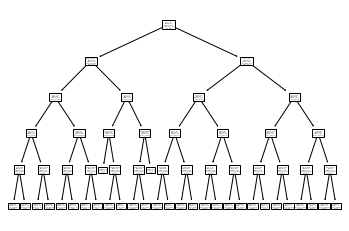

In [40]:
# params={'criterion':['gini', 'entropy'],
#        'max_depth':[1, 2, 3, 4, 5, 6]}
Igrid = GridSearchCV(estimator=Idrzewo, 
                    param_grid=params, 
                    verbose=10, 
                    scoring='accuracy',
                   cv=10)
Igrid.fit(Xi_train, yi_train)
plot_tree(Igrid.best_estimator_)
Igrid.best_score_



In [43]:
IModel = Igrid.best_estimator_
Ipredykcja = IModel.predict_proba(Xi_test)
Ipredykcja

[array([[0.00958466, 0.99041534],
        [0.00958466, 0.99041534],
        [0.03612167, 0.96387833],
        ...,
        [0.53349282, 0.46650718],
        [0.23853211, 0.76146789],
        [0.00958466, 0.99041534]]),
 array([[0.99041534, 0.00958466],
        [0.99041534, 0.00958466],
        [0.96387833, 0.03612167],
        ...,
        [0.46650718, 0.53349282],
        [0.76146789, 0.23853211],
        [0.99041534, 0.00958466]])]